In [1]:
install.packages('nortest')
install.packages('carData')
install.packages("VGAM")
library(ggplot2)
library(car)
library(VGAM)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Loading required package: carData
Loading required package: stats4
Loading required package: splines

Attaching package: ‘VGAM’

The following object is masked from ‘package:car’:

    logit



#### Question 1. 
Exercise 8.10. An article by ... describes the use of a replicated fractional factorial to investigate the effect of five factors on the tree height of the leaf springs used in an automotive application. The factors are A = furnace temperature, B = heating time, C= transfer time, D= hold down time, and E = quench oil temperature. 



### Answers:
###### (a.) Write out the alias structrue for this design. What is the resolution of this design?:
No main effects are aliased with any other main effect or two factor effects, yet are aliased with three factor interactions. Two factor interactions may be aliased with each other. This is a Resolution IV design.

###### (b.) Analyze the data. What factors influence the mean free height?
We can see from the mean squared error in the ANOVA that main effects A,D, and C effect the mean free height the most - in decending order.  The rest of the effects do not effect mean free height at all.

###### (c.) Calculate the range and standard deviation of the free height for each run. Is there any indication that any of these factors affects variability in the free height? 
Yes. From the standard deviation we can see there is a difference these factors affect variability in free height. The ANOVA shows the difference quantitatively. 

###### (d.) Analyze the residuals from this experiment, and comment on your findings. 
From the qqnorm plot we can see that this model is mediocore. The residuals almost follow the norms linearly. At the tail of the graph they fail away from the linearity. The fitted v residual plots show a slight change in variability yet is is close to normal distribution. It is a decent model yet this simple model could be tuned.  

###### (e.) Is this the best possible design for five factors in 16  runs? Specifically, can you find a fractional design for five factors in 16 runs with a higher resolution than this one?
No, a fraction of a half design results in a lower resolution as we can see from the fractional alias.

In [2]:
#recode the data: x=1 at level +; X=-1 at level -
coded=function(x) #a function to code variable x
{
  ifelse(x=="+", 1, -1)
}


In [3]:
#############################################
##     analysis of the one-half fraction    #
#############################################

#filtration rate data (eg. 8.1 page 325)
leaf=read.table("./data/leaf.txt", header = TRUE)
for (j in 1:5)
  leaf[, j]=as.numeric(coded(leaf[, j]))

leafLong=reshape(leaf, varying = c("frh1", "frh2", "frh3"), 
                 v.names = "Height", timevar = "FrH", direction = "long")

#factors have already been converted from "-","+" to -1, +1 coding
#2^(5-1) with I=ABCDD (Resolution V)
fraction=with(leaf, leaf[A * B * C * D * E == 1,])

fracLong=reshape(fraction, varying = c("frh1", "frh2", "frh3"), 
                 v.names = "Height", timevar = "FrH", direction = "long")

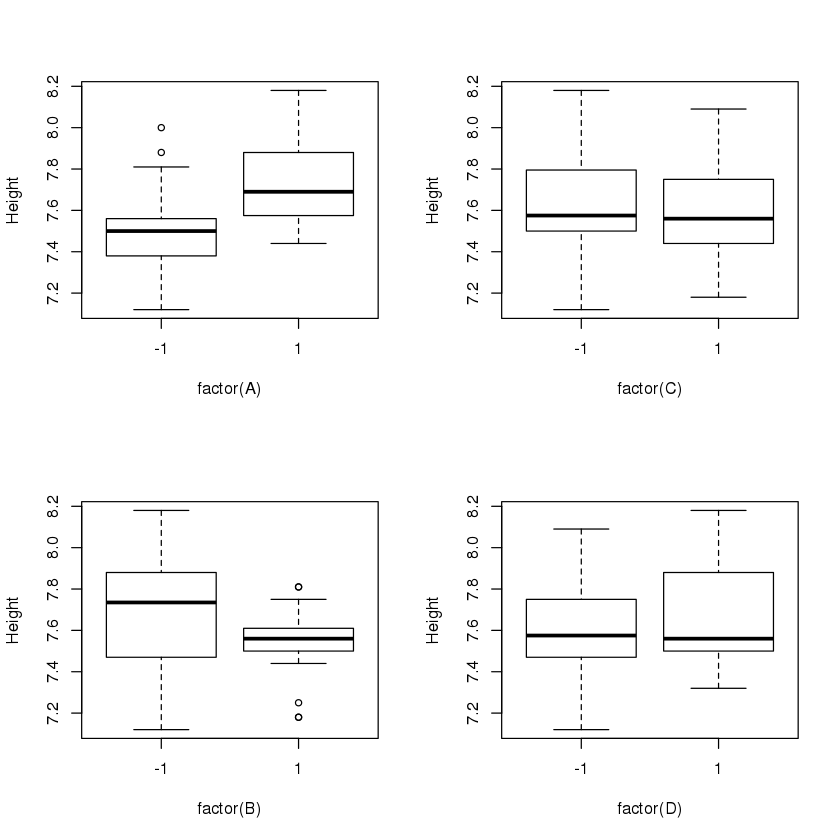

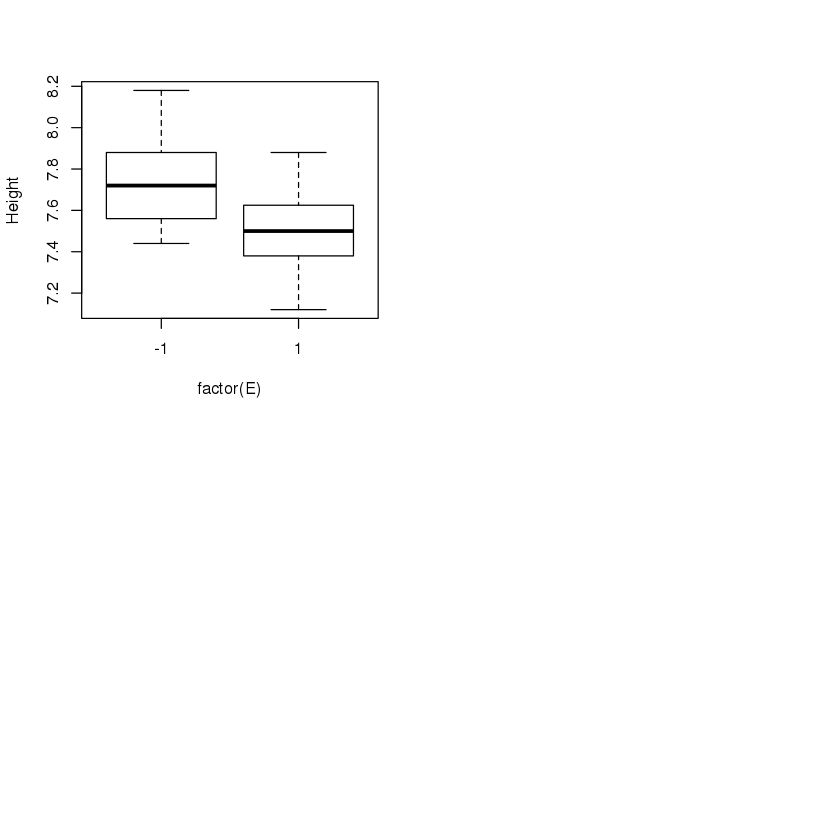

In [4]:
#factor effects
par(mfcol = c(2, 2))
plot(Height ~ factor(A) + factor(B) + factor(C) + factor(D) + factor(E), data = leafLong)


In [5]:
#aova
leaf.aov=aov(Height ~ factor(A) * factor(B) * factor(C) * factor(D) * factor(E), leafLong)
summary(leaf.aov)
mse=summary(leaf.aov)[[1]][8,3]
mse

#connection to linear regression
leaf.lm=lm(Height ~ A * B * C * D * E, leafLong)
summary(leaf.lm)


                              Df Sum Sq Mean Sq F value   Pr(>F)    
factor(A)                      1 0.7033  0.7033  35.888 1.12e-06 ***
factor(B)                      1 0.3218  0.3218  16.420 0.000302 ***
factor(C)                      1 0.0295  0.0295   1.506 0.228774    
factor(D)                      1 0.0999  0.0999   5.099 0.030893 *  
factor(E)                      1 0.6840  0.6840  34.906 1.42e-06 ***
factor(A):factor(B)            1 0.0105  0.0105   0.536 0.469451    
factor(A):factor(C)            1 0.0000  0.0000   0.001 0.975515    
factor(B):factor(C)            1 0.0063  0.0063   0.322 0.574603    
factor(A):factor(E)            1 0.0488  0.0488   2.489 0.124500    
factor(B):factor(E)            1 0.2806  0.2806  14.319 0.000640 ***
factor(C):factor(E)            1 0.0130  0.0130   0.664 0.421343    
factor(D):factor(E)            1 0.0188  0.0188   0.959 0.334662    
factor(A):factor(B):factor(E)  1 0.0001  0.0001   0.003 0.959204    
factor(A):factor(C):factor(E)  1 0

[1] 0.006302083


Call:
lm(formula = Height ~ A * B * C * D * E, data = leafLong)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.293333 -0.048333 -0.006667  0.075000  0.210000 

Coefficients: (16 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.625625   0.020205 377.411  < 2e-16 ***
A            0.121042   0.020205   5.991 1.12e-06 ***
B           -0.081875   0.020205  -4.052 0.000302 ***
C           -0.024792   0.020205  -1.227 0.228774    
D            0.045625   0.020205   2.258 0.030893 *  
E           -0.119375   0.020205  -5.908 1.42e-06 ***
A:B         -0.014792   0.020205  -0.732 0.469451    
A:C          0.000625   0.020205   0.031 0.975515    
B:C         -0.011458   0.020205  -0.567 0.574603    
A:D                NA         NA      NA       NA    
B:D                NA         NA      NA       NA    
C:D                NA         NA      NA       NA    
A:E          0.031875   0.020205   1.578 0.124500    
B:E     

In [69]:
rge <- apply(leaf[6:8],1,range)
v <- apply(leaf[6:8],1,var)
std <- sqrt(v)

In [73]:
std

[1] 0.01732051 0.16522712 0.03464102 0.10214369 0.23860707 0.22278540
 [7] 0.06110101 0.12503333 0.19313208 0.25403412 0.03464102 0.09609024
[13] 0.06928203 0.06506407 0.04041452 0.15947832

In [49]:
#Alias structure
alias(leaf.lm)
#Note: 1.The alias table has a column for each effect that has an estimate in the output,
#and a row for each effect with a missing estimate. 
#2.The “1” in a column shows which effect is aliased with the column label.

#Half-normal plot
qqnorm(leaf.aov, label = TRUE)
res = leafLong$Height-fitted(leaf.lm)


Model :
Height ~ A * B * C * D * E

Complete :
          (Intercept) A B C D E A:B A:C B:C A:E B:E C:E D:E A:B:E A:C:E B:C:E
A:D       0           0 0 0 0 0 0   0   1   0   0   0   0   0     0     0    
B:D       0           0 0 0 0 0 0   1   0   0   0   0   0   0     0     0    
C:D       0           0 0 0 0 0 1   0   0   0   0   0   0   0     0     0    
A:B:C     0           0 0 0 1 0 0   0   0   0   0   0   0   0     0     0    
A:B:D     0           0 0 1 0 0 0   0   0   0   0   0   0   0     0     0    
A:C:D     0           0 1 0 0 0 0   0   0   0   0   0   0   0     0     0    
B:C:D     0           1 0 0 0 0 0   0   0   0   0   0   0   0     0     0    
A:D:E     0           0 0 0 0 0 0   0   0   0   0   0   0   0     0     1    
B:D:E     0           0 0 0 0 0 0   0   0   0   0   0   0   0     1     0    
C:D:E     0           0 0 0 0 0 0   0   0   0   0   0   0   1     0     0    
A:B:C:D   1           0 0 0 0 0 0   0   0   0   0   0   0   0     0     0    
A:B:C:E   0      

ERROR: Error in min(x, na.rm = na.rm): invalid 'type' (list) of argument


10.3  5.1 
  42    5

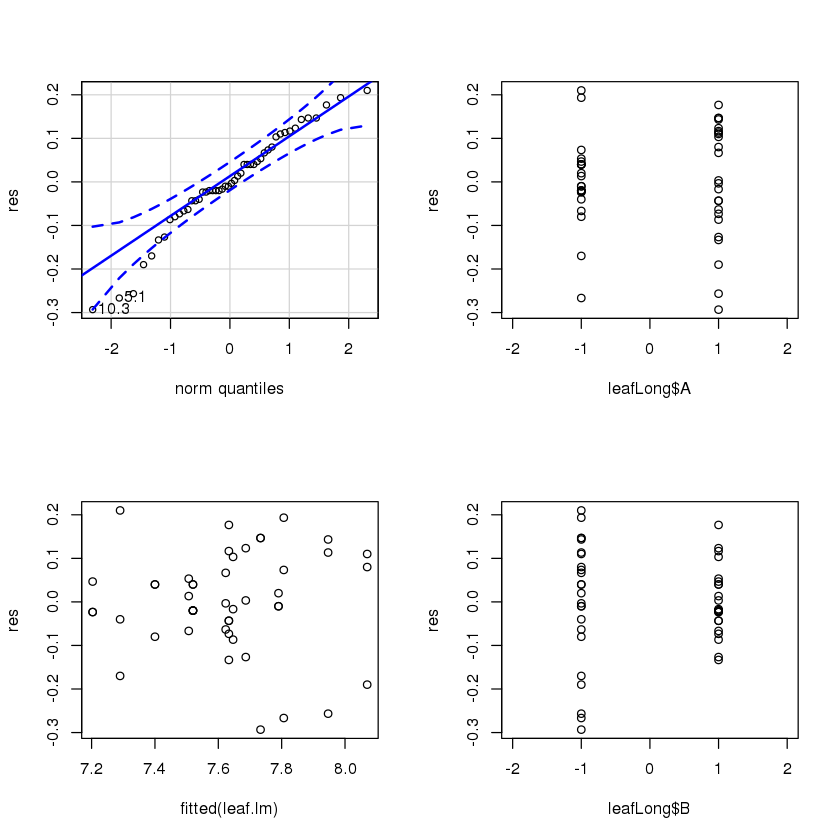

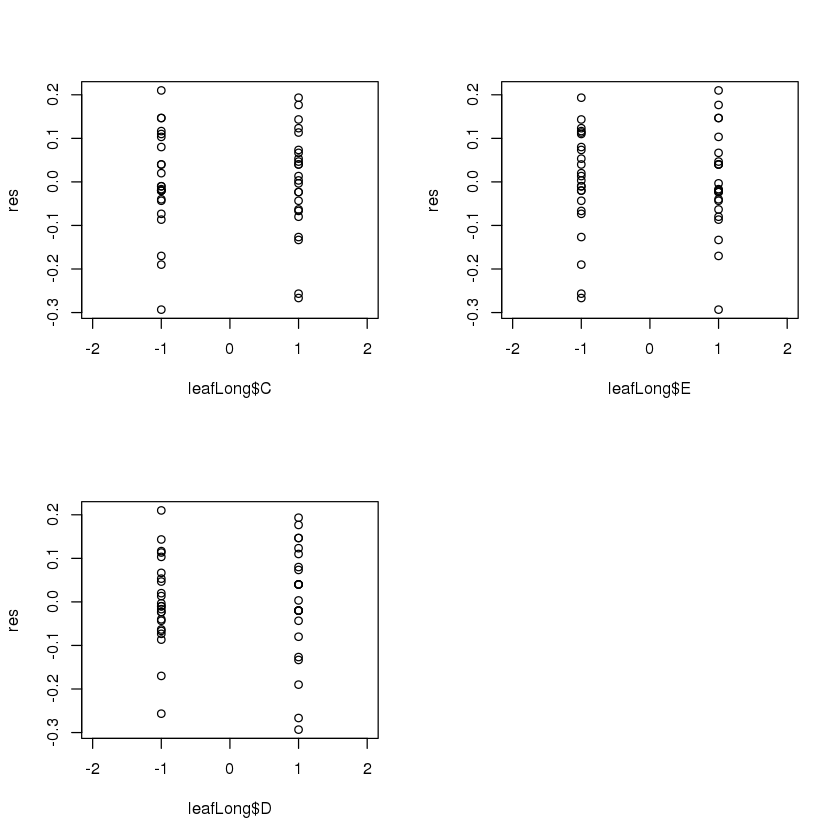

In [50]:
#Model adequacy checking

#residual plots
par(mfcol = c(2, 2))
res = leafLong$Height-fitted(leaf.lm)
qqPlot(res)
plot(fitted(leaf.lm), res) 
plot(leafLong$A, res, xlim=c(-2,2))
plot(leafLong$B, res, xlim=c(-2,2))
plot(leafLong$C, res, xlim=c(-2,2))
plot(leafLong$D, res, xlim=c(-2,2))
plot(leafLong$E, res, xlim=c(-2,2))

In [51]:
summary(frac.aov)


            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1 0.5612  0.5612  30.260 4.84e-05 ***
B            1 0.0007  0.0007   0.038   0.8480    
C            1 0.0408  0.0408   2.202   0.1573    
D            1 0.1027  0.1027   5.538   0.0317 *  
A:B          1 0.0045  0.0045   0.245   0.6276    
A:C          1 0.0026  0.0026   0.140   0.7128    
B:C          1 0.0408  0.0408   2.202   0.1573    
Residuals   16 0.2967  0.0185                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [52]:
frac.lm = lm(Height ~ A * B * C * D * E, fracLong)
frac.aov = aov(Height ~ A * B * C * D * E, fracLong)
summary(frac.lm)

#Alias structure
alias(frac.lm)
#Note: 1.The alias table has a column for each effect that has an estimate in the output,
#and a row for each effect with a missing estimate. 
#2.The “1” in a column shows which effect is aliased with the column label.

#Half-normal plot
qqnorm(frac.aov, label = TRUE)



Call:
lm(formula = Height ~ A * B * C * D * E, data = fracLong)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29333 -0.04833 -0.01833  0.05167  0.21000 

Coefficients: (24 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.506250   0.027798 270.026  < 2e-16 ***
A            0.152917   0.027798   5.501 4.84e-05 ***
B           -0.005417   0.027798  -0.195   0.8480    
C           -0.041250   0.027798  -1.484   0.1573    
D            0.065417   0.027798   2.353   0.0317 *  
E                  NA         NA      NA       NA    
A:B         -0.013750   0.027798  -0.495   0.6276    
A:C          0.010417   0.027798   0.375   0.7128    
B:C         -0.041250   0.027798  -1.484   0.1573    
A:D                NA         NA      NA       NA    
B:D                NA         NA      NA       NA    
C:D                NA         NA      NA       NA    
A:E                NA         NA      NA       NA    
B:E               

Model :
Height ~ A * B * C * D * E

Complete :
          (Intercept) A B C D A:B A:C B:C
E         1           0 0 0 0 0   0   0  
A:D       0           0 0 0 0 0   0   1  
B:D       0           0 0 0 0 0   1   0  
C:D       0           0 0 0 0 1   0   0  
A:E       0           1 0 0 0 0   0   0  
B:E       0           0 1 0 0 0   0   0  
C:E       0           0 0 1 0 0   0   0  
D:E       0           0 0 0 1 0   0   0  
A:B:C     0           0 0 0 1 0   0   0  
A:B:D     0           0 0 1 0 0   0   0  
A:C:D     0           0 1 0 0 0   0   0  
B:C:D     0           1 0 0 0 0   0   0  
A:B:E     0           0 0 0 0 1   0   0  
A:C:E     0           0 0 0 0 0   1   0  
B:C:E     0           0 0 0 0 0   0   1  
A:D:E     0           0 0 0 0 0   0   1  
B:D:E     0           0 0 0 0 0   1   0  
C:D:E     0           0 0 0 0 1   0   0  
A:B:C:D   1           0 0 0 0 0   0   0  
A:B:C:E   0           0 0 0 1 0   0   0  
A:B:D:E   0           0 0 1 0 0   0   0  
A:C:D:E   0           0 1 0 0

ERROR: Error in min(x, na.rm = na.rm): invalid 'type' (list) of argument


2.3 1.1 
 18   1

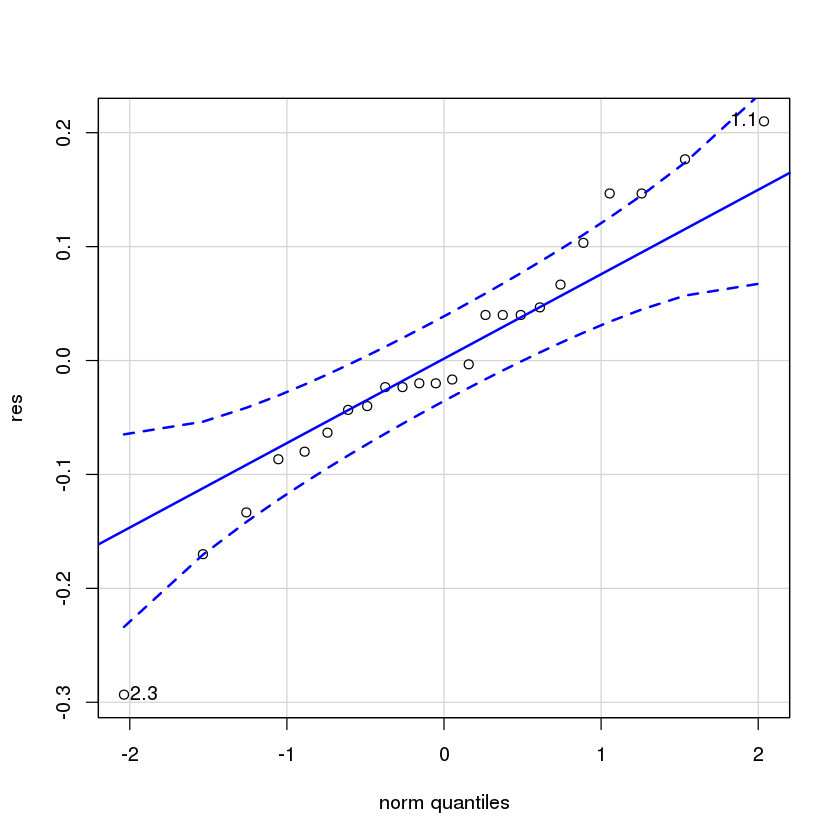

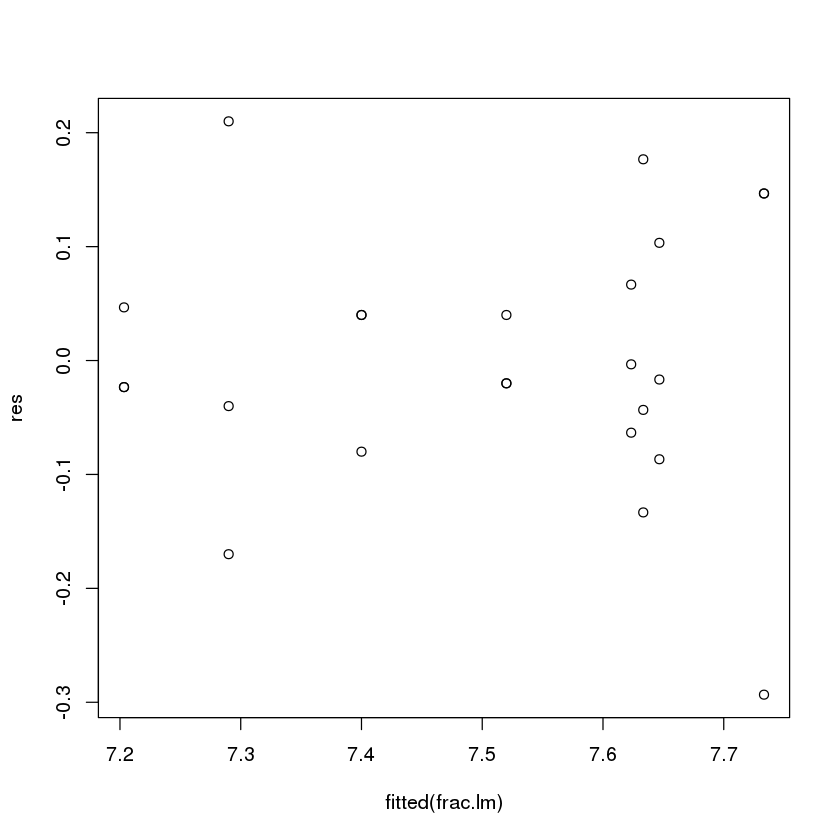

In [53]:
res = fracLong$Height-fitted(frac.lm)
qqPlot(res)
plot(fitted(frac.lm), res) 

## Question 2. 
Exercise 8.12 change dat to 8.10 from 8.7: Consider the leaf experiment problem in 8.10. Suppose that factor E (quench oil temperature) is very difficult to control during manufacturing. Where would you set factors A,B,C,D to reduce variability in the free height as much as possible regardless of the quench oil temperature used? 
###### Answer:
From the resiudals v effects plot we can see that the lower variability in leaf spring height would come from these settings during the manufacturing cycle:
* A low, B high, C low, D low.

## Question 3. 
A plant biologist conducted an experiment to compare the yields of 4 varieties of peanuts (A,B,C,D). A plot of land was divied into 16 subplots (4 rows and 4 columns), where rows correspond to different watering frequencies and columns correspond to different soil types. The following Latin square design was run. The responses are given in the following table. Analyze the data and draw appropriate conclusions. Comment on models adquacy. Use $\alpha = 0.05$
###### Answer:
From all of the various residual plots we can see the residuals do not follow a normal distribution. They appear to from the fitted v residual yet the standard v fitted the variance seems to change which is an indication of the residuals not following a normal distribution. The ANOVA is in the table below which shows that there is no significant difference in the mean yield of the crop generated by water freq and soiltype. We can also see from the Tukey test below that there is no difference in the variablility between the various factors. It is also clear that the residuals are not normally distributed which tells us that this is not a adequate model for use to predict yield of a peanut crop. The P(>F) of the ANOVA is > 0.05 which shows there is no differences in the treatment means. 



In [11]:
pyield = read.table("./data/pbio.txt", header = TRUE)
pyield.aov = aov(Yield ~ factor(freq) + factor(soiltype) + factor(form), pyield)
summary(aov(Yield ~ factor(freq) + factor(soiltype) + factor(form), pyield))
mse=summary(pyield.aov)[[1]][4,3]
mse

                 Df Sum Sq Mean Sq F value Pr(>F)
factor(freq)      3  31.95  10.651   0.831  0.524
factor(soiltype)  3  53.97  17.991   1.403  0.330
factor(form)      3  17.26   5.752   0.449  0.727
Residuals         6  76.94  12.824               

[1] 12.82396

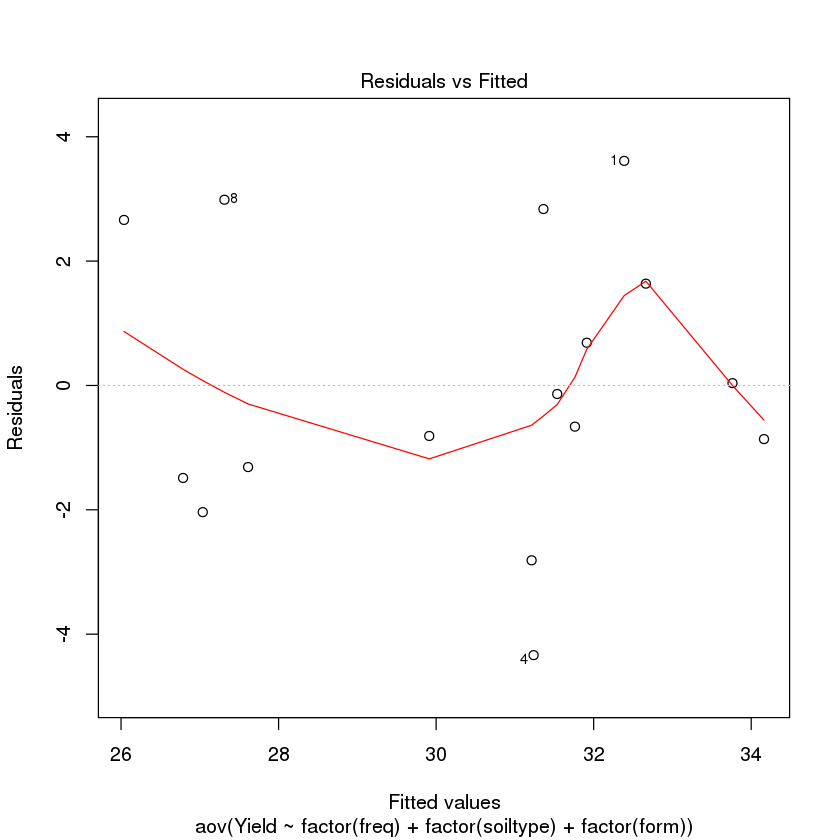

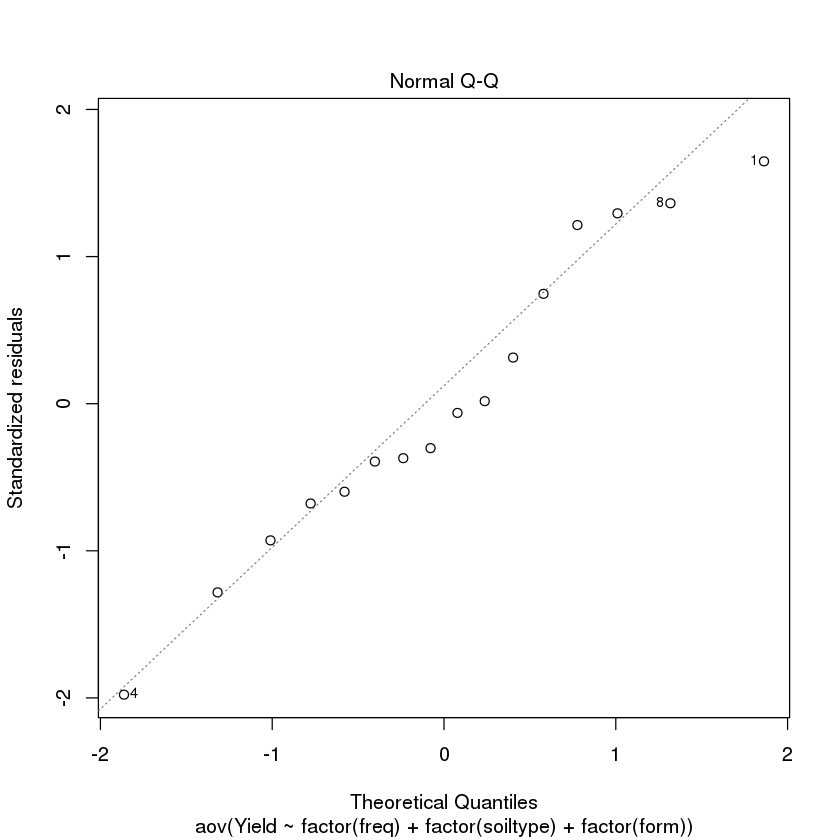

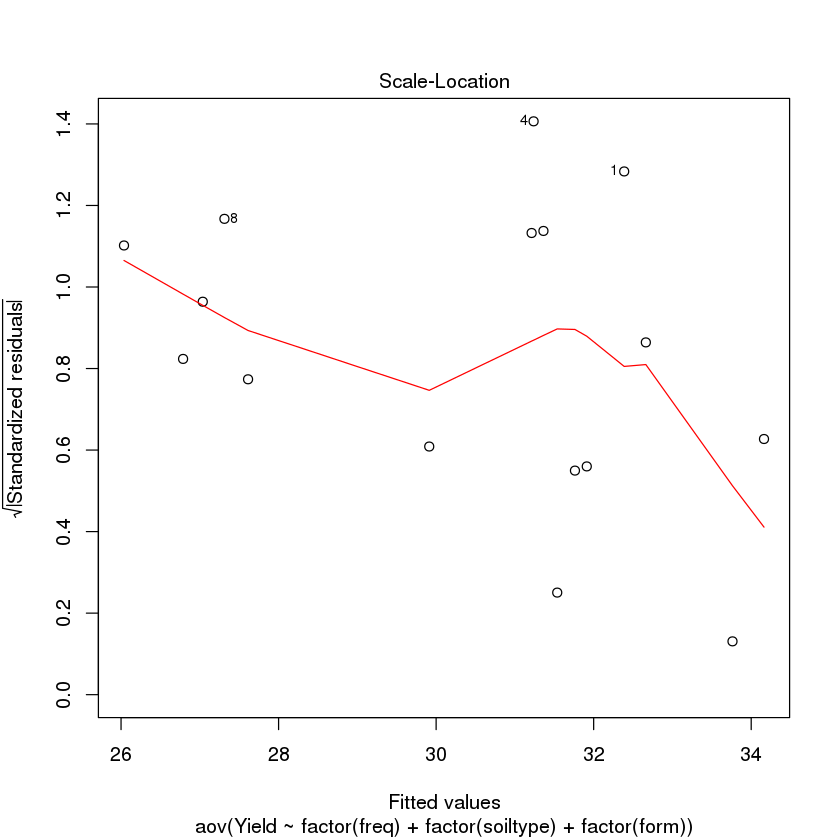

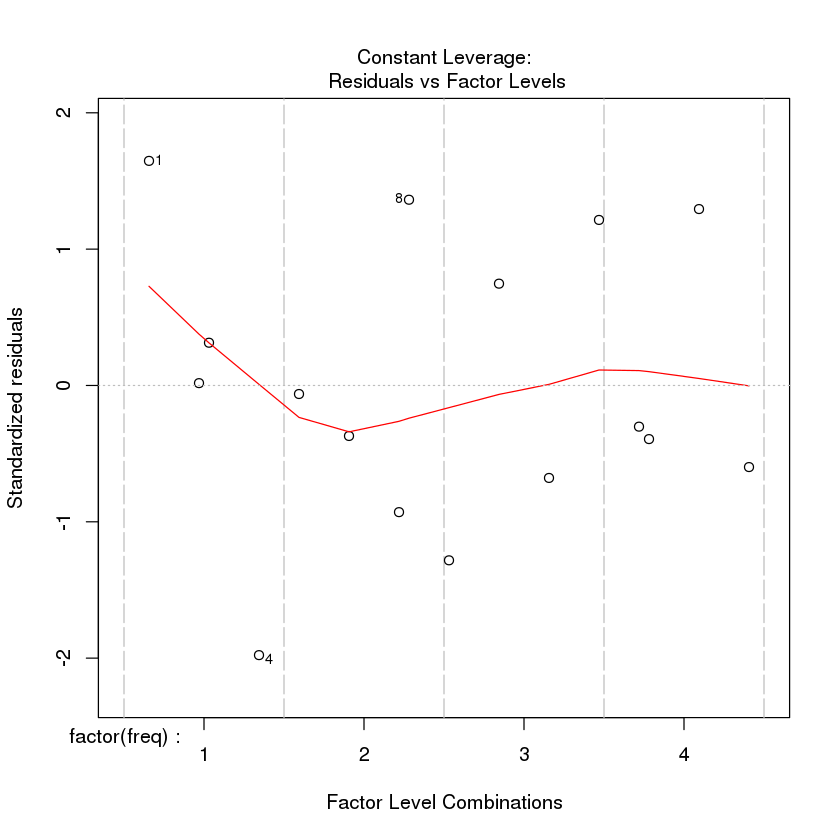

In [12]:
#normal probability plot(qq plot)
library(car)
plot(pyield.aov)


In [13]:
alpha = 0.05
overall.mean = mean(pyield$Yield)
n = 4
a = 4
N = n*a
dgf = N - a
ybar.trt=as.vector(with(pyield, tapply(Yield,soiltype,function(x) mean(x))))


	Bartlett test of homogeneity of variances

data:  Yield by soiltype
Bartlett's K-squared = 2.7473, df = 3, p-value = 0.4322



	Bartlett test of homogeneity of variances

data:  Yield by freq
Bartlett's K-squared = 0.31612, df = 3, p-value = 0.957


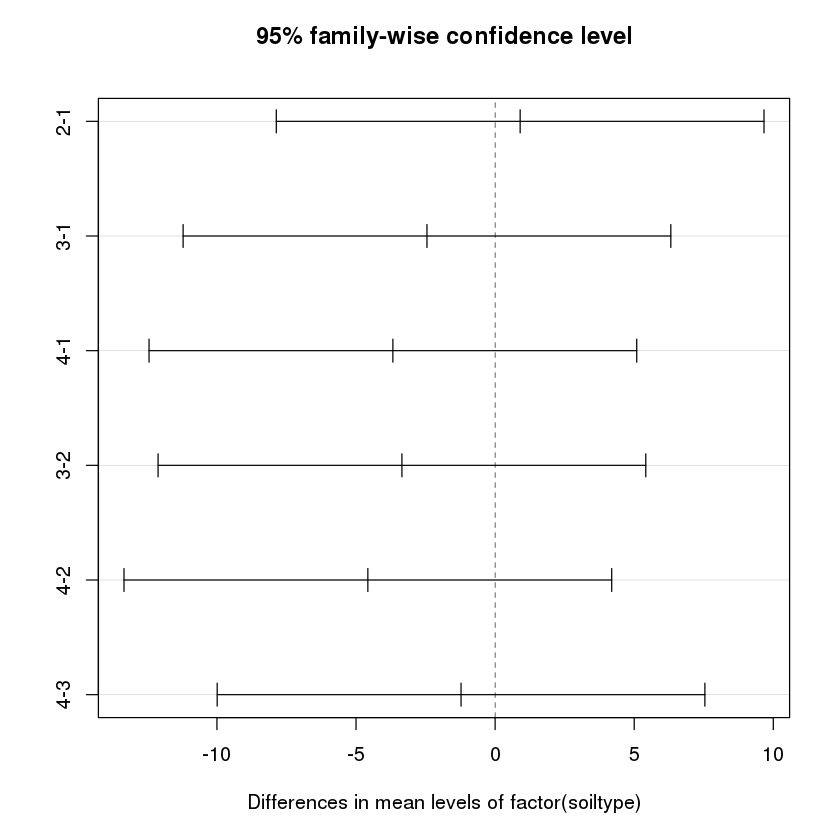

In [14]:
#Tukey's method (for comparing all possible pairwise means)
pyield.TK=TukeyHSD(pyield.aov, "factor(soiltype)")
plot(pyield.TK)


#test homogeneity of variances 
with(pyield, bartlett.test(Yield ~ soiltype))
with(pyield, bartlett.test(Yield ~ freq))

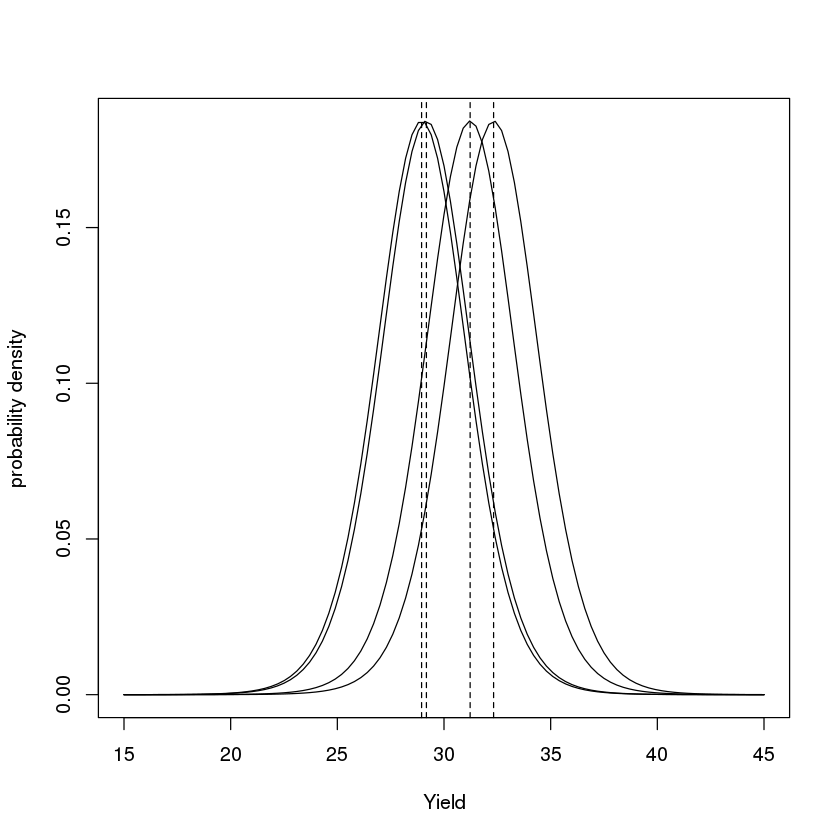

In [15]:

# replace std dev with the sqrt(MSe) using scale factor of n
MSe=summary(pyield.aov)[[1]][2,3]
t.crit=qt(1-alpha/2,N-a)
s = sqrt(MSe/n)
me=c(-1,1)*t.crit*sqrt(MSe/n)
ybar.1 = mean(pyield[1:4,4])
ybar.2 = mean(pyield[5:8,4])
ybar.3 = mean(pyield[9:12,4])
ybar.4 = mean(pyield[13:16,4])

#graphical comparisions means
curve(dt((x - ybar.1)/s, df = dgf)/s, from = 15, to = 45, ylab="probability density", xlab="Yield")
abline(v = ybar.1, lty = 2)
curve(dt((x - ybar.2)/s, df = dgf)/s, add = TRUE)
abline(v = ybar.2, lty = 2)
curve(dt((x - ybar.3)/s, df = dgf)/s, add = TRUE)
abline(v = ybar.3, lty = 2)
curve(dt((x - ybar.4)/s, df = dgf)/s, add = TRUE)
abline(v = ybar.4, lty = 2)

### Question 4.
An experiment was conducted to determine whether either firing temperature or furnace position affects the baked densitry of a carbonanode. The data are shown below. Suppose we assume that no interaction exists. Write down the statistical model. Conduct the analysis of variance and test hypotheses on the main effects. What conclusions can be drawn? Comment on the models adequacy. 

##### Answer:

Statistical Model (RCBD): $\quad y_{ij} = \mu + \tau_{i} + \beta_{j} + \epsilon_{ij}$

It is very clear from the ANOVA performed that temp and position in the oven both effect the density of the material. In particular temperature is the more significant factor by more than 10 orders of magnitude. From the residual v. fitted plots we can clearly see the variance doesn't change much which is an indication that the residuals come from a normal distribution. From the Theo quant v residuals plot it is also visually clear the residuals come from a normal distribution. This model is adequate at show Using the Bartlett test we can see there is no homogeneity among variance of temp or position. Also, by visual inspection of the Tukey difference in means we notice a clear significant difference in means of material density. 

In [16]:
temp = rep(rep(c(800, 825, 850, 875), 2), each=4)
position = rep(c(1,2), each=16)
density = c(584,556,585,563,1076,1102,1101,1019,1016,996,1030,1001,562,534,590,544,
            538,530,515,605,1028,993,1007,1011,937,905,1033,949,500,510,540,541)
mf = data.frame(position, temp, density)


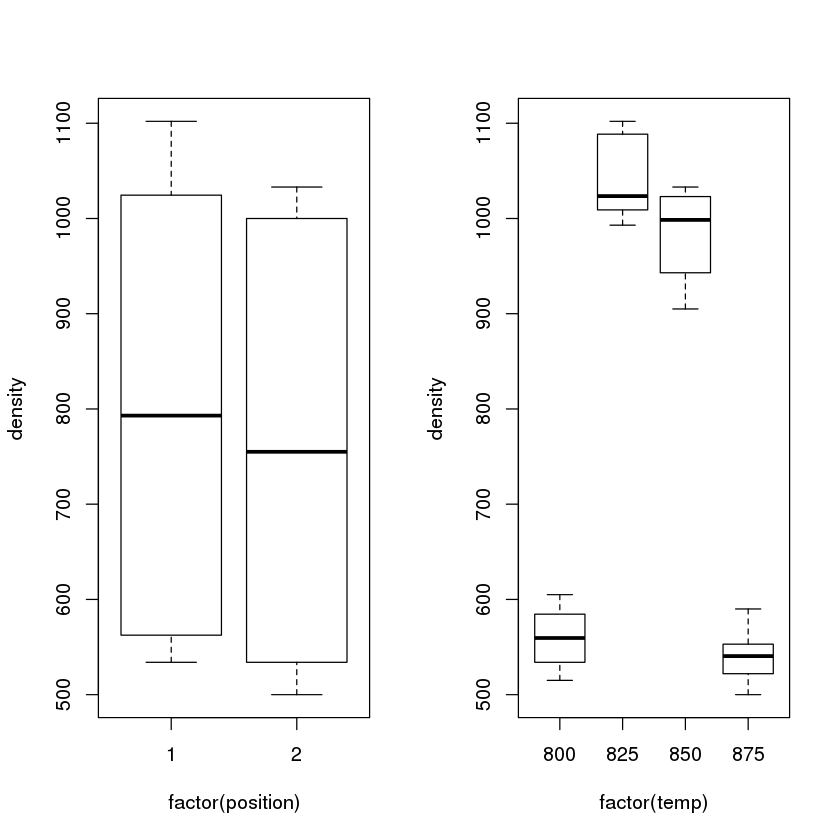

In [17]:
#factor effects
par(mfcol = c(1, 2))
plot(density ~ factor(position) + factor(temp), data = mf)


In [18]:
mf.aov = aov(density ~ factor(position) + factor(temp), mf)
summary(aov(density ~ factor(position) + factor(temp), mf))


                 Df  Sum Sq Mean Sq F value   Pr(>F)    
factor(position)  1   16065   16065   17.13 0.000306 ***
factor(temp)      3 1729797  576599  614.75  < 2e-16 ***
Residuals        27   25324     938                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

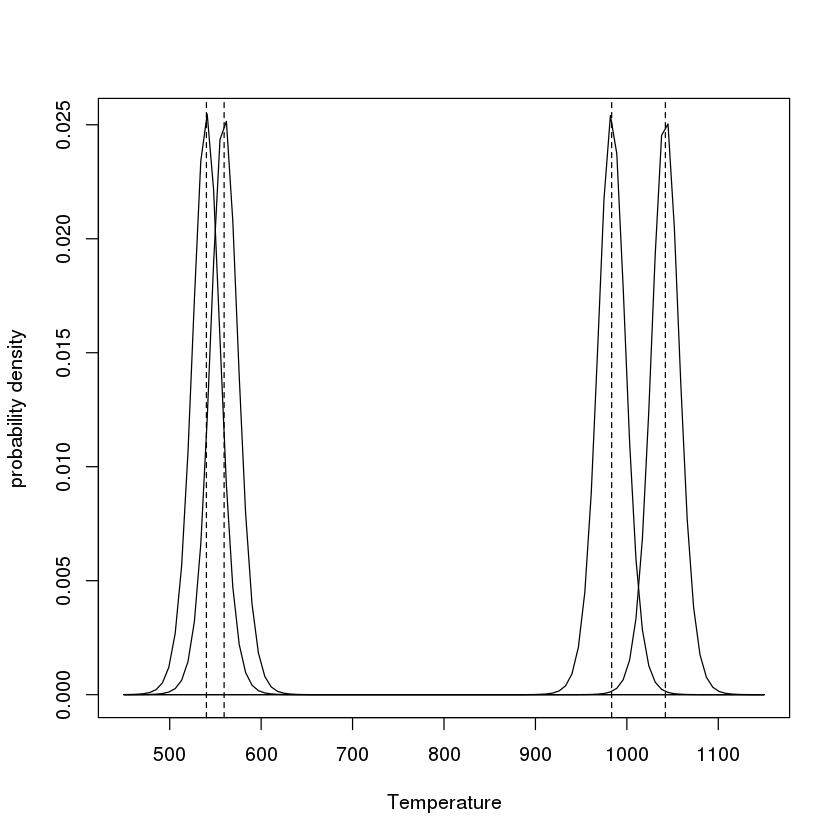

In [19]:
a = 4
n = 4
N = a*n
alpha = 0.05
dgf = N - a
# replace std dev with the sqrt(MSe) using scale factor of n
MSe=summary(mf.aov)[[1]][3,3]
t.crit=qt(1-alpha/2,N-a)
s = sqrt(MSe/n)
me=c(-1,1)*t.crit*sqrt(MSe/n)
ybar.1 = mean(c(mf[1:4,3], mf[17:20,3]))
ybar.2 = mean(c(mf[5:8,3],mf[21:24,3]))
ybar.3 = mean(c(mf[9:12,3],mf[25:28,3]))
ybar.4 = mean(c(mf[13:16,3],mf[29:32,3]))

#graphical comparisions means
curve(dt((x - ybar.1)/s, df = dgf)/s, from = 450, to = 1150, ylab="probability density", xlab="Temperature")
abline(v = ybar.1, lty = 2)
curve(dt((x - ybar.2)/s, df = dgf)/s, add = TRUE)
abline(v = ybar.2, lty = 2)
curve(dt((x - ybar.3)/s, df = dgf)/s, add = TRUE)
abline(v = ybar.3, lty = 2)
curve(dt((x - ybar.4)/s, df = dgf)/s, add = TRUE)
abline(v = ybar.4, lty = 2)

[1] 27 20

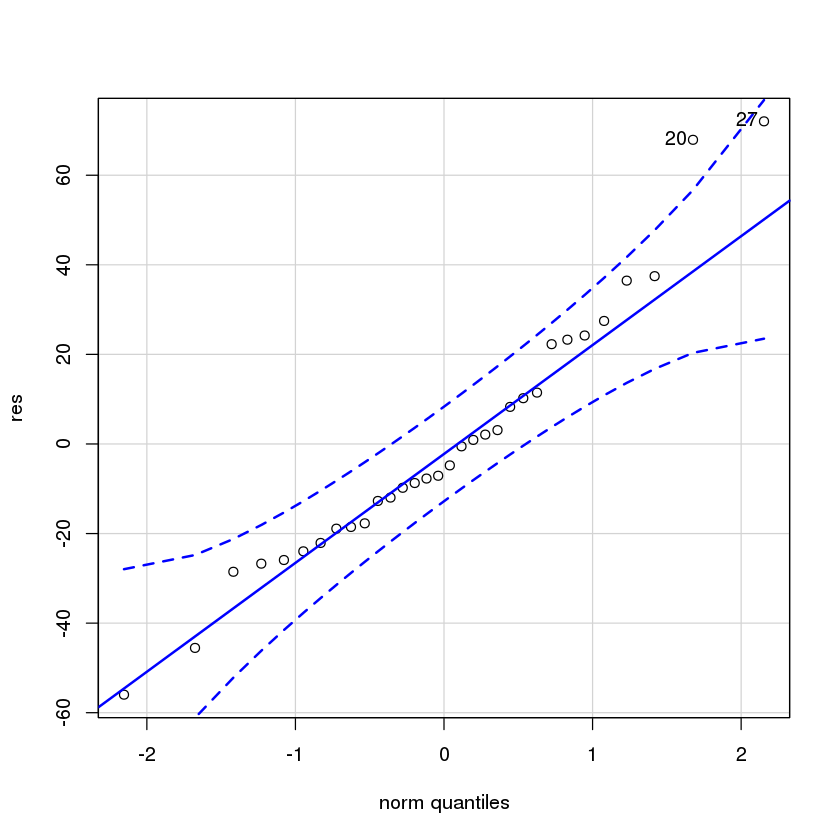

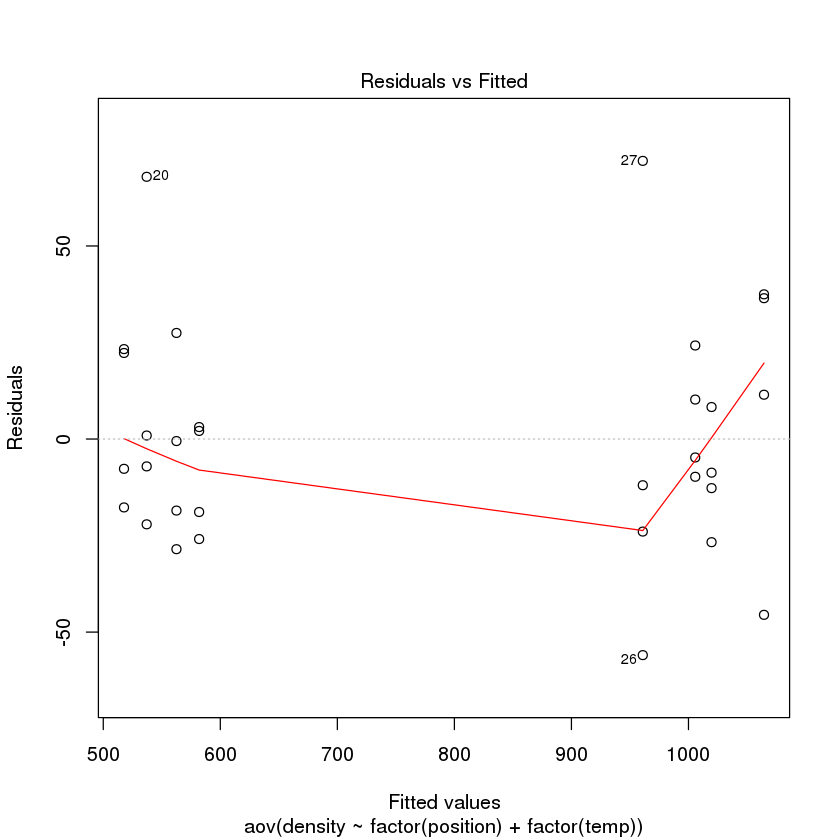

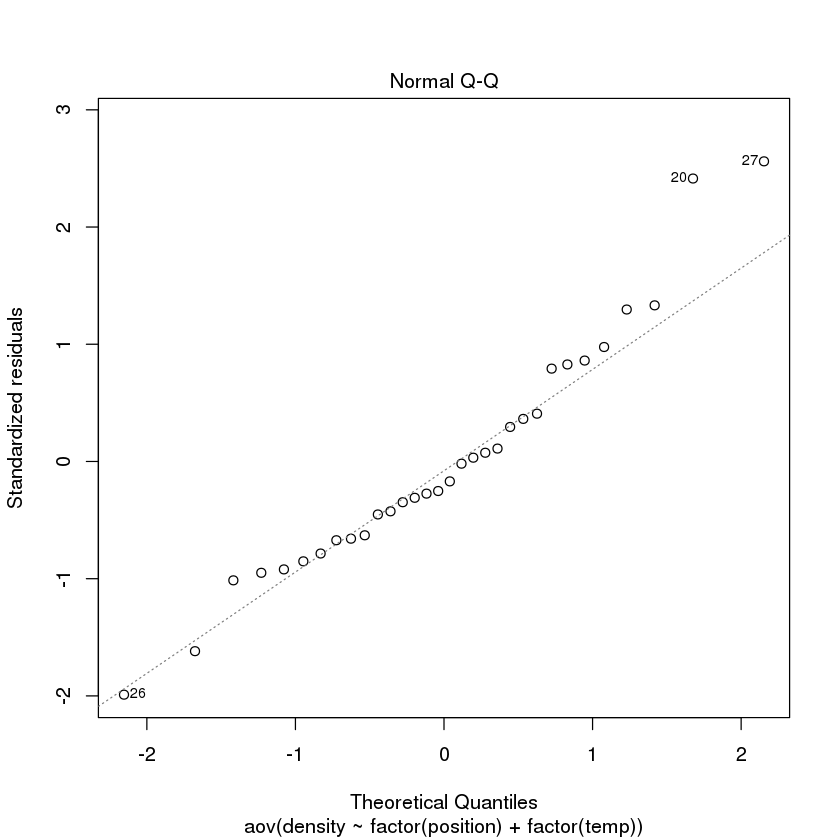

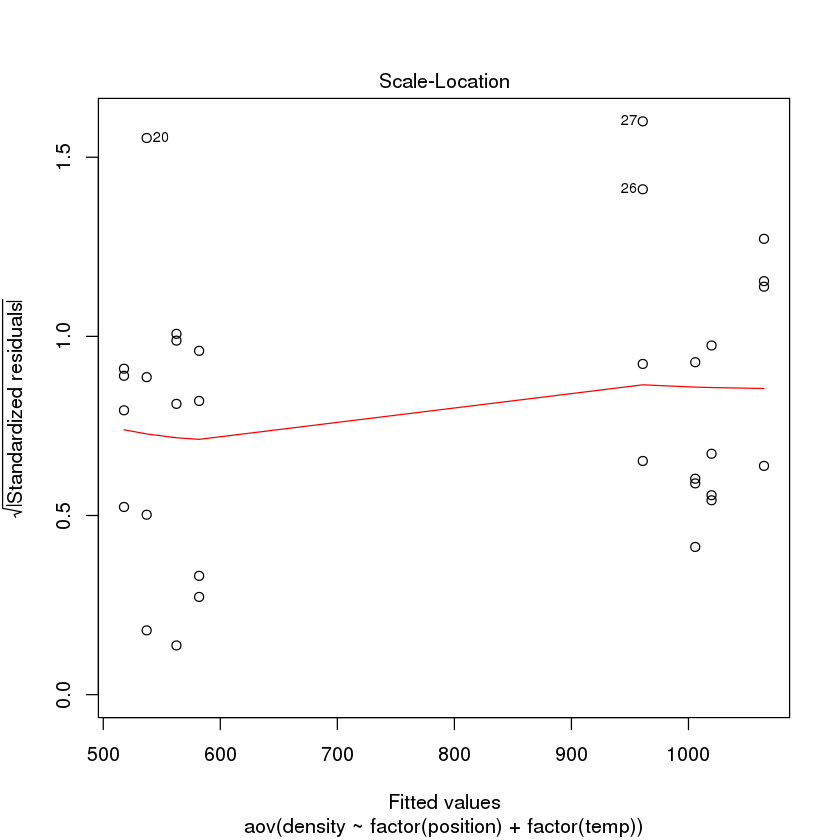

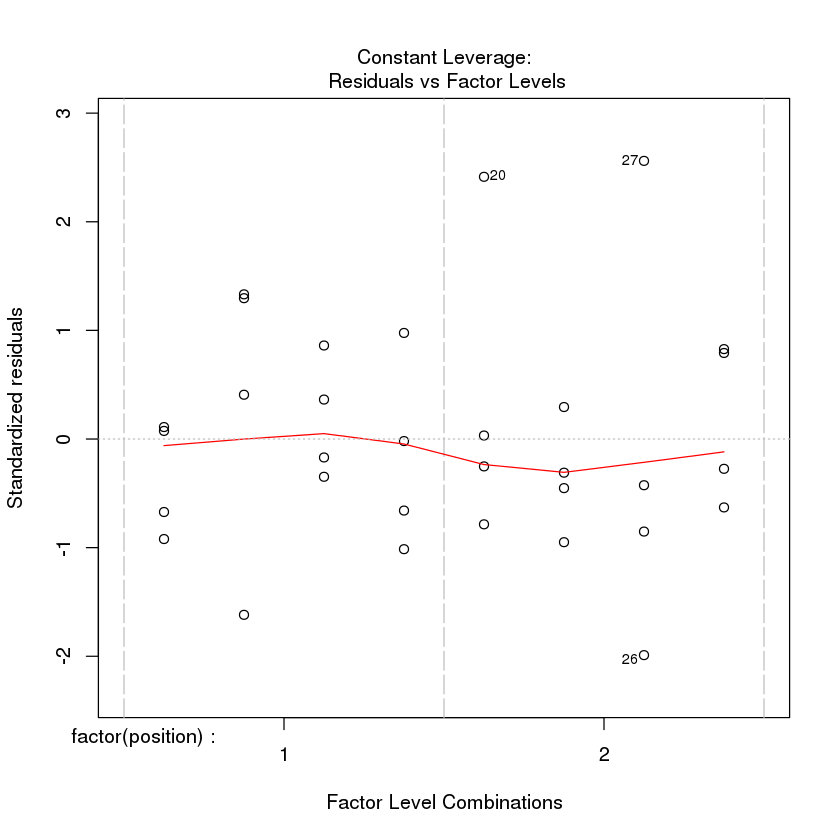

In [20]:

res = mf$densit-fitted(mf.aov)
qqPlot(res)
plot(mf.aov) 

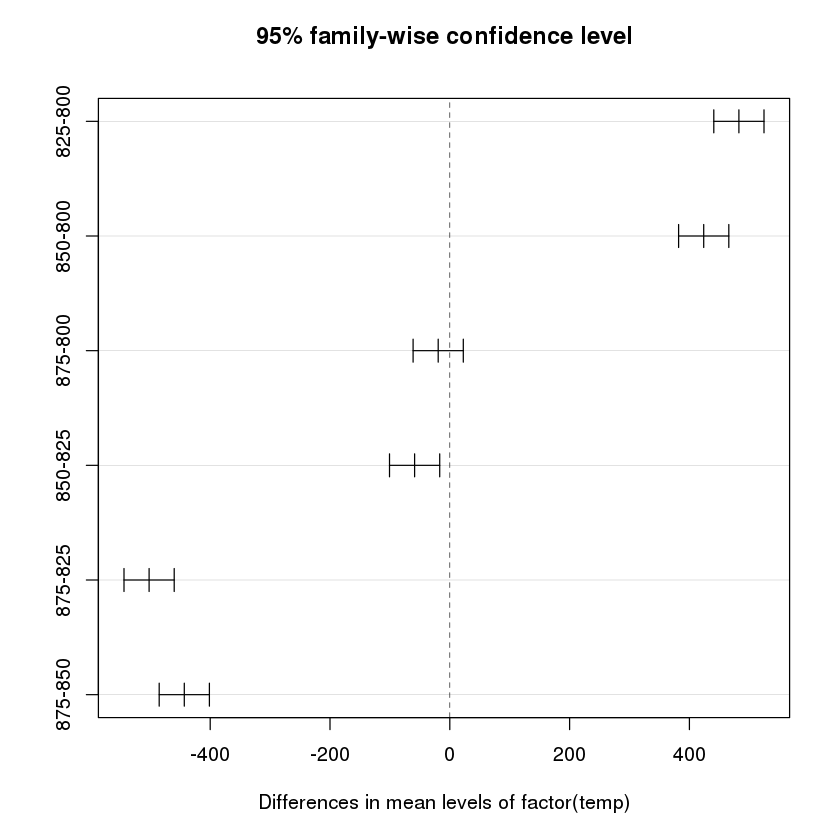


	Bartlett test of homogeneity of variances

data:  density by temp
Bartlett's K-squared = 2.5316, df = 3, p-value = 0.4696



	Bartlett test of homogeneity of variances

data:  density by position
Bartlett's K-squared = 0.051371, df = 1, p-value = 0.8207


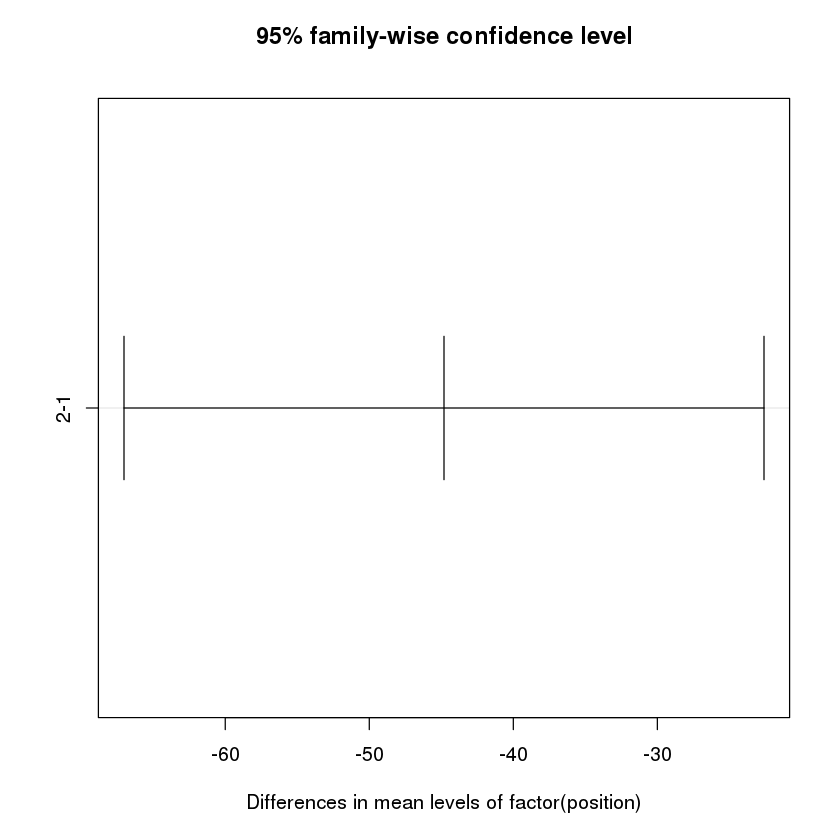

In [21]:
#Tukey's method (for comparing all possible pairwise means)
mf.TK=TukeyHSD(mf.aov, "factor(temp)")
mf.TK2=TukeyHSD(mf.aov, "factor(position)")
plot(mf.TK)
plot(mf.TK2)

#test homogeneity of variances 
with(mf, bartlett.test(density ~ temp))
with(mf, bartlett.test(density ~ position))

## Question 5.

An engineer is interested in the effects of cutting speed(A), tool geometry(B), amd cutting angle(C) on the life (in hours) of a machine tool. Two levels of each factor are chosen, and four replicates of a $2^3$ factorial design are run. The results are below. 

### Answers
##### a. Estimate the factor effects? Which effects appear to be large? 
The factor effects are as listed. a:6.0325	b:-0.18 c:-0.07 ab:5.4375 ac:1 bc:0.145 abc:2.0975. We can see that a has the biggest effect on battery life with a and b in combination to be the second largest. b and c have small effects. From the factor effects plots this information is visually clear.
####  b. Use the analysis of variance to confirm your conclusions for part a. (use $\alpha=0.5$) 
We can see from the anova that a is the only significant factor in changing (improving) the battery life with a p-value of 0.0207. The others are highly non significant.
##### c. Write down the regression model based on the results of this experiment.
$y = 28.776+3.016(A)-0.090(B)-0.035(C)$
##### d. On the basis an analysis of the main effect and interaction plots, what coded factor levels of A, B, C would you recommend using?
A = high, B = low, C = low
##### e. Analyze residuals from the experiment. Are there any obvious problems? 
From the fitted v. residuals plot we can see that the variance changes with increase in Life. This is a hint that the residuals do not come from a normal distribution. Yet, the points that change the variability are outliers. From the Theoretical Quantiles v Standard residuals plot we can see that the residuals somewhat follow a normal distribution yet it is a little skeptical. The model explains 0.088 of the variability so it is a weak model to begin with which tells us the residual do not follow a normal distribution.

In [22]:
a <- rep(c(-1, 1), 4)
b <- rep(c(-1, -1, 1, 1), 2)
c <- c(-1, -1, -1, -1, 1, 1, 1, 1)
Life <- matrix(c(30.82,28.89,8.22,38.08,23.95,29.06,17.12,34.29,26.79,28.71,39.58,38.21,31.06,24.23,23.74,35.88,
         23.98,27.77,16.96,23.92,27.83,30.38,30.70,39.65,30.92,33.91,33.09,31.13,33.20,30.36,14.20,34.21),ncol=4)

batt = read.table("./data/finalp5.txt", header = TRUE)
for (j in 1:3)
  batt[, j]=as.numeric(coded(batt[, j]))

battLong = data.frame(a,b,c,Life)
for (j in 1:3)
  battLong[, j]=as.numeric(coded(battLong[, j]))


Total <- apply(battLong,1,sum)
battLong <- cbind(battLong,Total)

# #reps: n=4
n=4

In [23]:
# Effect estimates are differences of averages of 4 means ("runs")
# Effect estimates:
Aeff <- (Total %*% a)/(4*n)
Beff <- (Total %*% b)/(4*n)
Ceff <- (Total %*% c)/(4*n)

# Interaction effects
AB <- a*b
AC <- a*c
BC <- b*c
ABC <- a*b*c
# cbind(a,b,c,AB,AC,BC,ABC,Total)
ABeff <- (Total %*% AB)/(4*n)
ACeff <- (Total %*% AC)/(4*n)
BCeff <- (Total %*% BC)/(4*n)
ABCeff <- (Total %*% ABC)/(4*n)

# Summary
Effects <- t(Total) %*% cbind(a,b,c,AB,AC,BC,ABC)/(4*n)
Summary <- rbind(cbind(a,b,c,AB,AC,BC,ABC),Effects)
dimnames(Summary)[[1]] <- c(dimnames(battLong)[[1]],"Effect")
Summary

,a,b,c,AB,AC,BC,ABC
1,-1.0000,-1.00,-1.00,1.0000,1,1.000,-1.0000
2,1.0000,-1.00,-1.00,-1.0000,-1,1.000,1.0000
3,-1.0000,1.00,-1.00,-1.0000,1,-1.000,1.0000
4,1.0000,1.00,-1.00,1.0000,-1,-1.000,-1.0000
5,-1.0000,-1.00,1.00,1.0000,-1,-1.000,1.0000
6,1.0000,-1.00,1.00,-1.0000,1,-1.000,-1.0000
7,-1.0000,1.00,1.00,-1.0000,-1,1.000,-1.0000
8,1.0000,1.00,1.00,1.0000,1,1.000,1.0000
Effect,6.0325,-0.18,-0.07,5.4375,1,0.145,2.0975


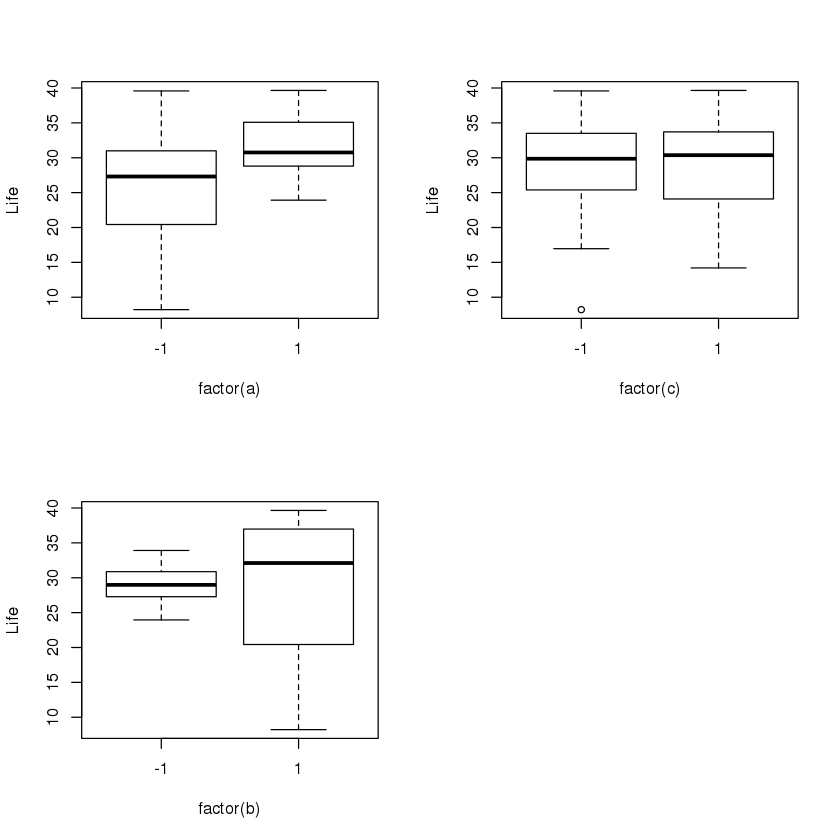

In [24]:
#factor effects
par(mfcol = c(2, 2))
plot(Life ~ factor(a) + factor(b) + factor(c), data = batt)


In [25]:
bLong=reshape(batt, varying = c("Rep1", "Rep2", "Rep3", "Rep4"), 
                 v.names = "Life", timevar = "Batt", direction = "long")
#aova
batt.aov=aov(Life ~ factor(A) + factor(B) + factor(C), bLong)
summary(batt.aov)
mse=summary(batt.aov)[[1]][4,3]

#connection to linear regression
batt.lm=lm(Life ~ A + B + C, bLong)
summary(batt.lm)



            Df Sum Sq Mean Sq F value Pr(>F)  
factor(A)    1  291.1  291.13   6.017 0.0207 *
factor(B)    1    0.3    0.26   0.005 0.9422  
factor(C)    1    0.0    0.04   0.001 0.9775  
Residuals   28 1354.7   48.38                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
lm(formula = Life ~ A + B + C, data = bLong)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4850  -3.0725   0.1488   5.0425  13.8750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   28.776      1.230  23.403   <2e-16 ***
A              3.016      1.230   2.453   0.0207 *  
B             -0.090      1.230  -0.073   0.9422    
C             -0.035      1.230  -0.028   0.9775    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.956 on 28 degrees of freedom
Multiple R-squared:  0.177,	Adjusted R-squared:  0.08886 
F-statistic: 2.008 on 3 and 28 DF,  p-value: 0.1357


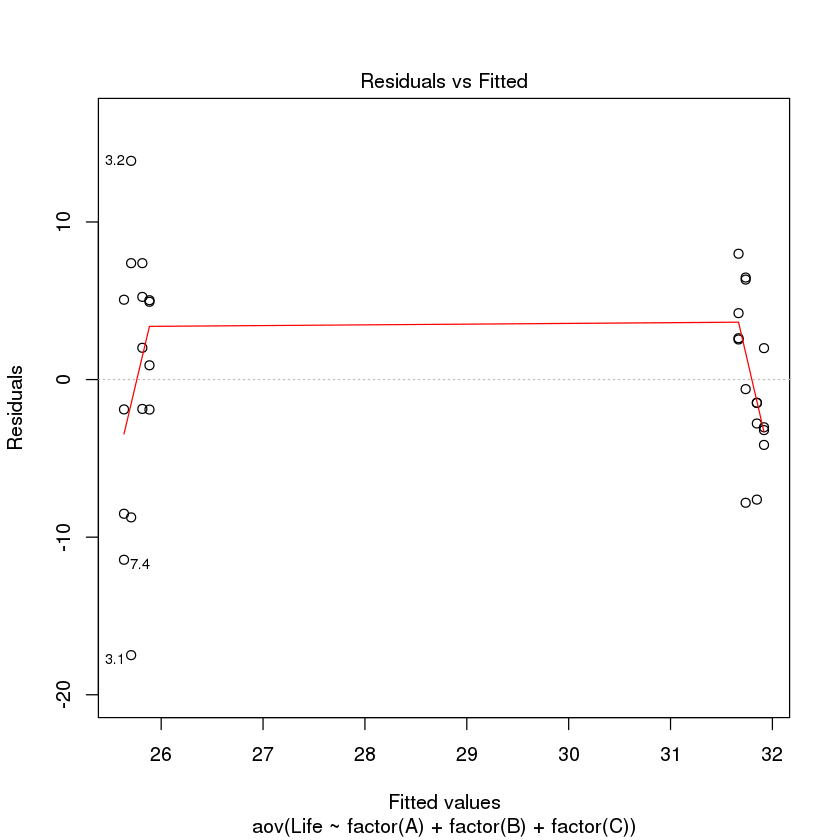

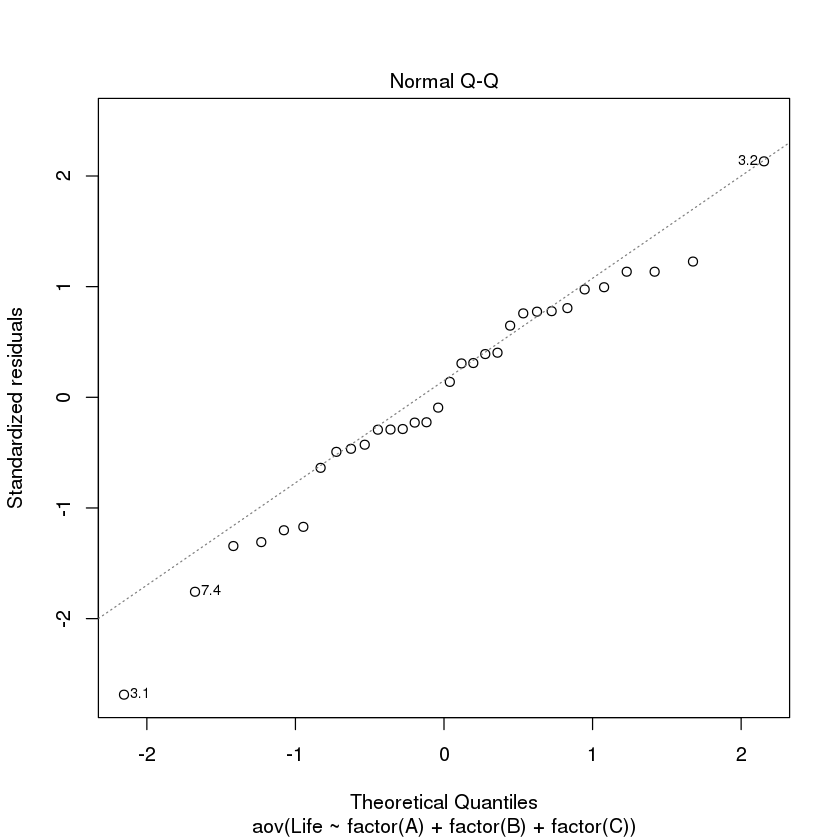

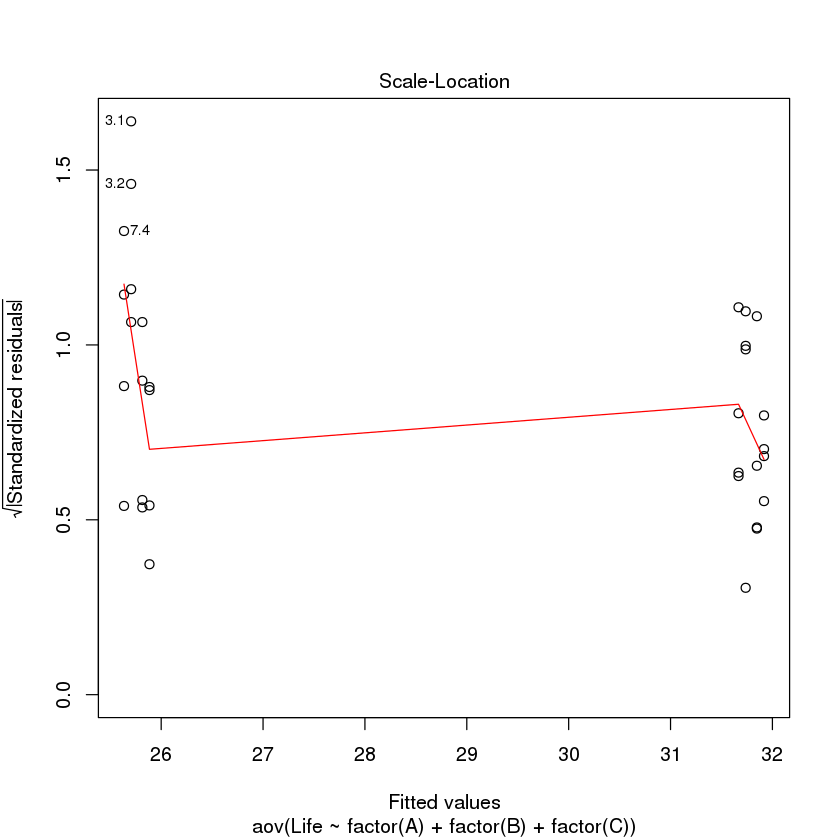

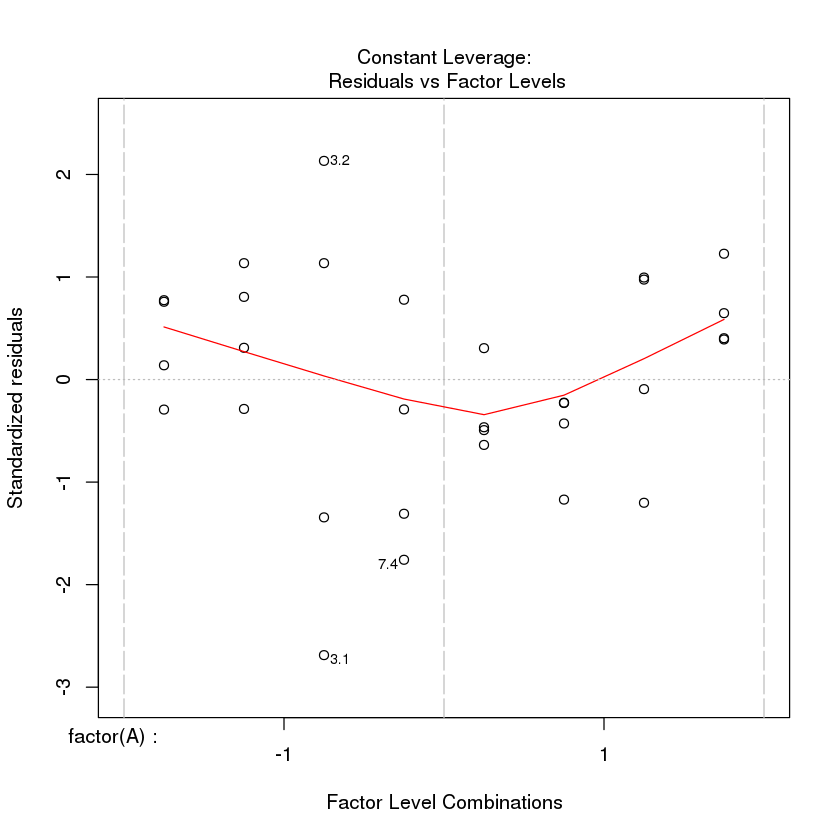

In [26]:
plot(batt.aov)

## Question 6
An experimenter created a 5-factor 8-run design by assgning I = ABCD = BCD ( or, D = ABC and E = BC).


### Answers:
###### a. What is the design generator? What is the alias structure? 
Main effects are aliased with two factor effects and are aliased with three factor interactions. Two factor interactions are aliased with each other. This is a Resolution III design.

###### b. Analyze the data. Comment on findings.
From the start we can see from the adjusted R sqd(0.9379) the model explains about 94 percent of the variabiity in the response. We start the analysis by analyzing the residuals and find that the residuals may come from a normal distribution. Without more data we cannot say that this true. Yet from the information we have we can say the data appear to potentially come from a normal distribution. The fitted v. residuals plot shows variance does not change much along the X axis. This is an indication the residuals come from a normal distribution. Yet, the points which keep the variance equal are outliers. The theoritcal v residuals plot shows that the residuals do not come from a normal distribution. The immediate conclusion is that the residuals do not come from a distribution. 

###### c. The fold-over runs appear below. Analyze the whole data and compare the analysis to your analysis in part (b.) Are there any remaining uncertainties in your analysis of this experiment?

After analysis of the fold over data set we can say that this model is not adequate. The residual plots appear the same which tell us the residuals do not come from a normal distribution. 

In [27]:
A <- rep(c(1, -1), 4)
B <- rep(c(1, 1, -1, -1), 2)
C <- c(1, 1, 1, 1,-1, -1, -1, -1)
D <- c(1,-1,-1,1,-1,1,1,-1)
E <- c(-1,-1,1,1,1,1,-1,-1)
Response <- c(34.69,34.00,35.56,12.89, 31.36, 15.09, 32.45,31.85)

rep = data.frame(A,B,C,D,E,Response)

In [28]:
rep.lma = lm(Response ~ A * B * C * D * E, rep)
rep.aov = aov(Response ~ factor(A) + factor(B) + factor(C) + factor(D) + factor(E), rep)
# 
#Alias structure
alias(rep.lma)

# for regression
rep.lm = lm(Response ~ A+B+C+D+E, rep)


Model :
Response ~ A * B * C * D * E

Complete :
          (Intercept) A  B  C  D  E  A:B A:C
B:C        0           0  0  0  0 -1  0   0 
A:D        0           0  0  0  0 -1  0   0 
B:D        0           0  0  0  0  0  0   1 
C:D        0           0  0  0  0  0  1   0 
A:E        0           0  0  0 -1  0  0   0 
B:E        0           0  0 -1  0  0  0   0 
C:E        0           0 -1  0  0  0  0   0 
D:E        0          -1  0  0  0  0  0   0 
A:B:C      0           0  0  0  1  0  0   0 
A:B:D      0           0  0  1  0  0  0   0 
A:C:D      0           0  1  0  0  0  0   0 
B:C:D      0           1  0  0  0  0  0   0 
A:B:E      0           0  0  0  0  0  0  -1 
A:C:E      0           0  0  0  0  0 -1   0 
B:C:E     -1           0  0  0  0  0  0   0 
A:D:E     -1           0  0  0  0  0  0   0 
B:D:E      0           0  0  0  0  0 -1   0 
C:D:E      0           0  0  0  0  0  0  -1 
A:B:C:D    1           0  0  0  0  0  0   0 
A:B:C:E    0          -1  0  0  0  0  0   0 
A:B:D:


Call:
lm(formula = Response ~ A + B + C + D + E, data = rep)

Residuals:
      1       2       3       4       5       6       7       8 
 0.0225 -0.0225  1.6000 -1.6000 -1.6000  1.6000 -0.0225  0.0225 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.4862     0.8001  35.604 0.000788 ***
A             5.0287     0.8001   6.285 0.024391 *  
B             0.2987     0.8001   0.373 0.744714    
C             0.7987     0.8001   0.998 0.423290    
D            -4.7063     0.8001  -5.882 0.027706 *  
E            -4.7612     0.8001  -5.951 0.027095 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.263 on 2 degrees of freedom
Multiple R-squared:  0.9822,	Adjusted R-squared:  0.9379 
F-statistic: 22.13 on 5 and 2 DF,  p-value: 0.04379


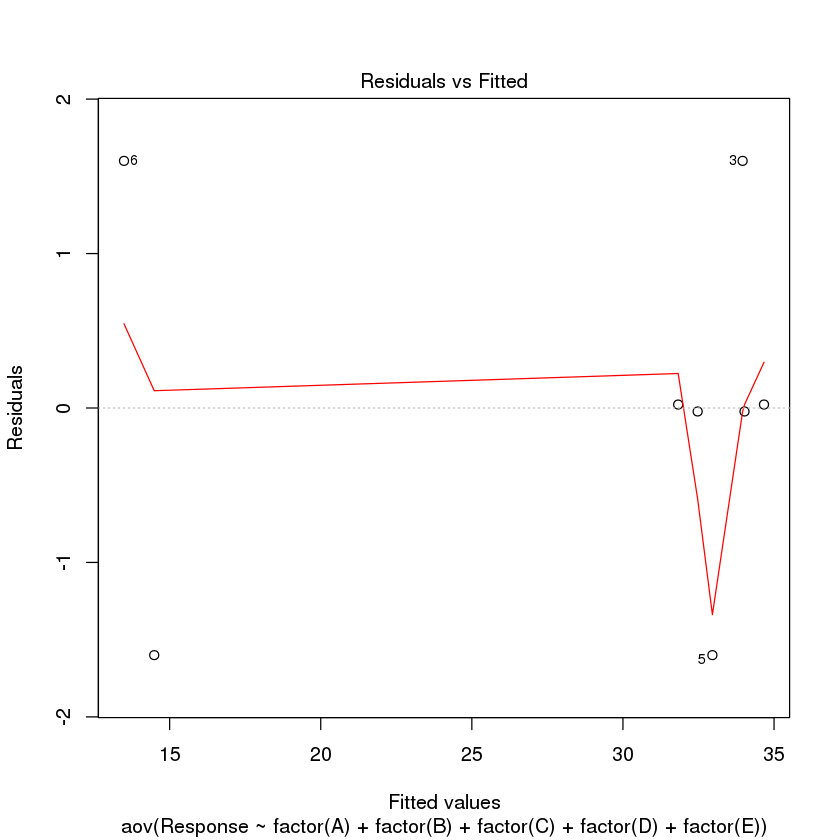

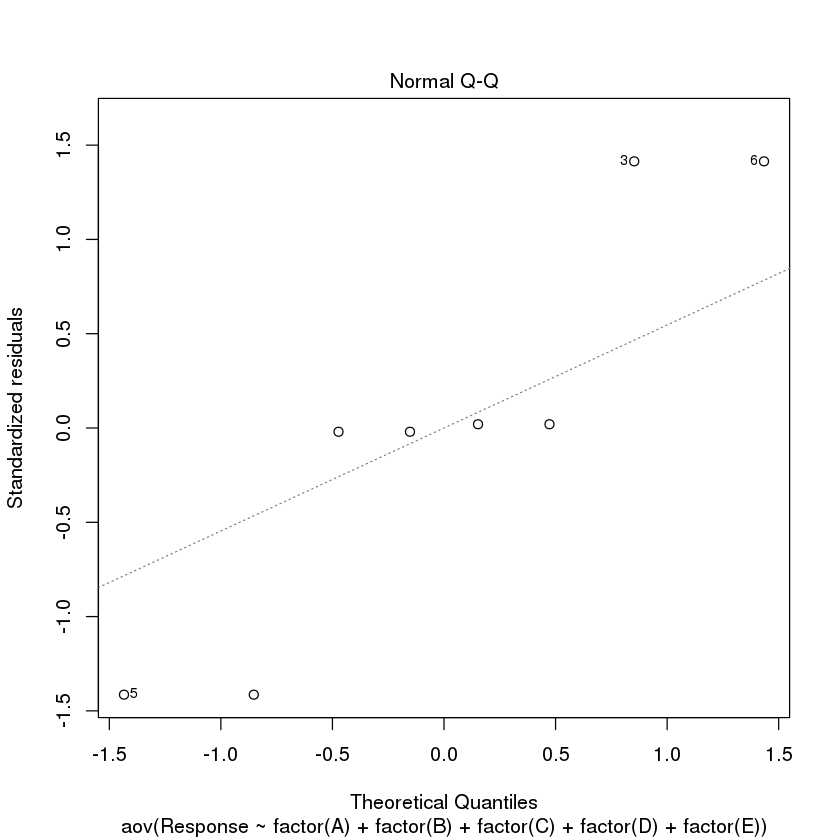

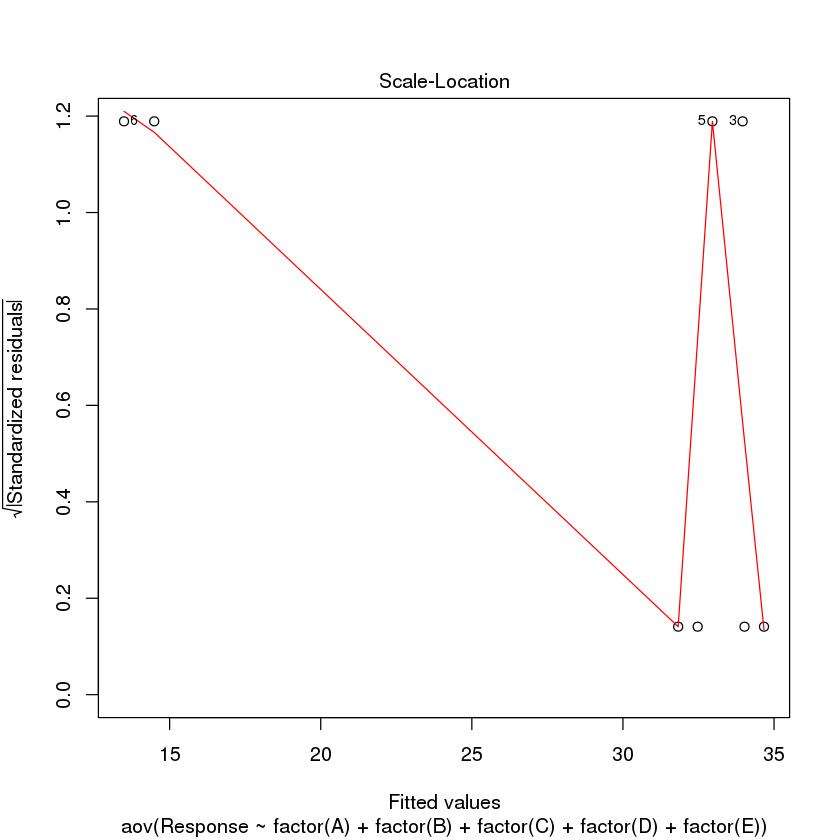

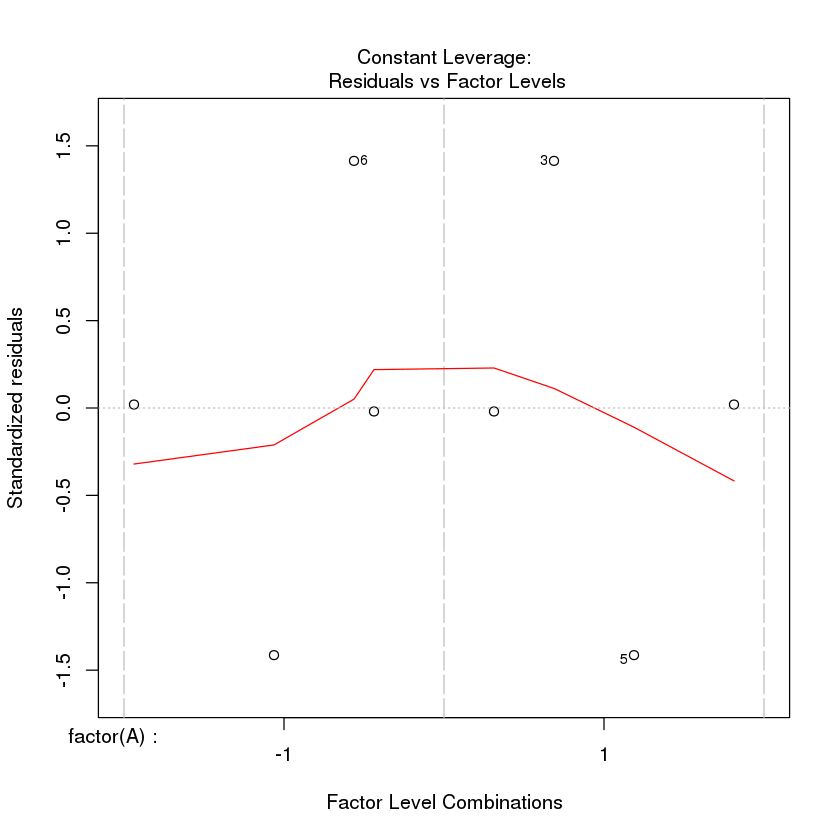

In [29]:
summary(rep.lm)
plot(rep.aov)

In [30]:
a2 <- rep(c(-1, 1), 4)
b2 <- rep(c(-1, -1, 1, 1), 2)
c2 <- c(-1, -1, -1, -1, 1, 1, 1, 1)
d2 <- c(1,-1,-1,1,-1,1,1,-1)
e2 <- c(-1,-1,1,1,1,1,-1,-1)
response2 <- c(34.69,34.00,35.56,12.89,31.36,15.09,32.45,31.85)

rep2 = data.frame(a2,b2,c2,d2,e2,response2)

rep2.aov = aov(response2 ~ factor(a2) + factor(b2) + factor(c2) + factor(d2) + factor(e2), data=rep2)

# for regression
rep2.lm = lm(response2 ~ a2+b2+c2+d2+e2, data=rep2)


Call:
lm(formula = response2 ~ a2 + b2 + c2 + d2 + e2, data = rep2)

Residuals:
      1       2       3       4       5       6       7       8 
 0.0225 -0.0225  1.6000 -1.6000 -1.6000  1.6000 -0.0225  0.0225 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.4862     0.8001  35.604 0.000788 ***
a2           -5.0287     0.8001  -6.285 0.024391 *  
b2           -0.2987     0.8001  -0.373 0.744714    
c2           -0.7987     0.8001  -0.998 0.423290    
d2           -4.7063     0.8001  -5.882 0.027706 *  
e2           -4.7612     0.8001  -5.951 0.027095 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.263 on 2 degrees of freedom
Multiple R-squared:  0.9822,	Adjusted R-squared:  0.9379 
F-statistic: 22.13 on 5 and 2 DF,  p-value: 0.04379


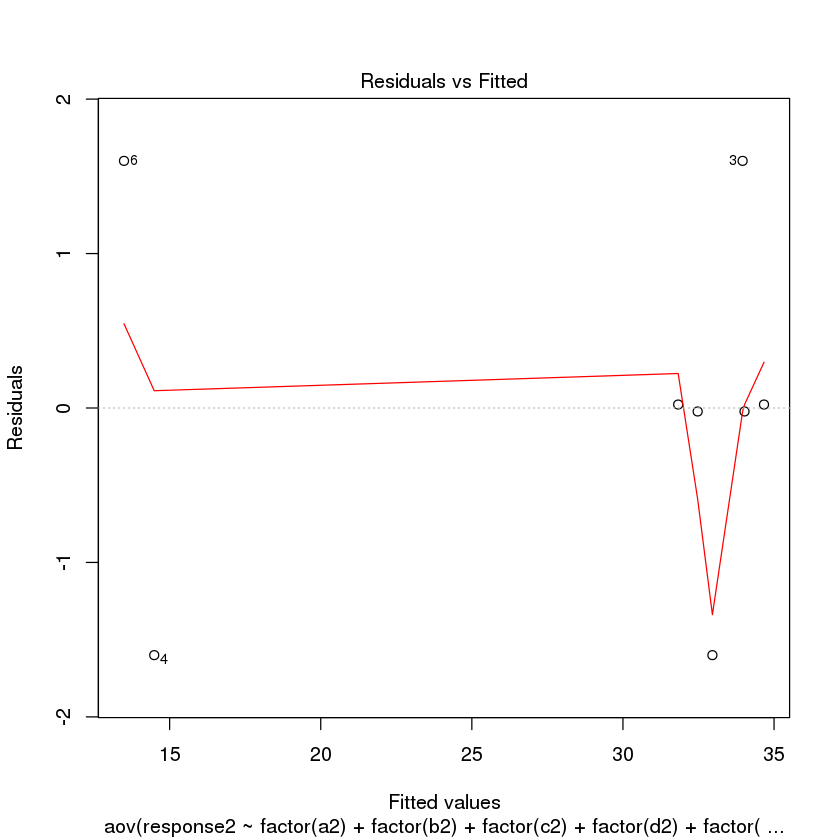

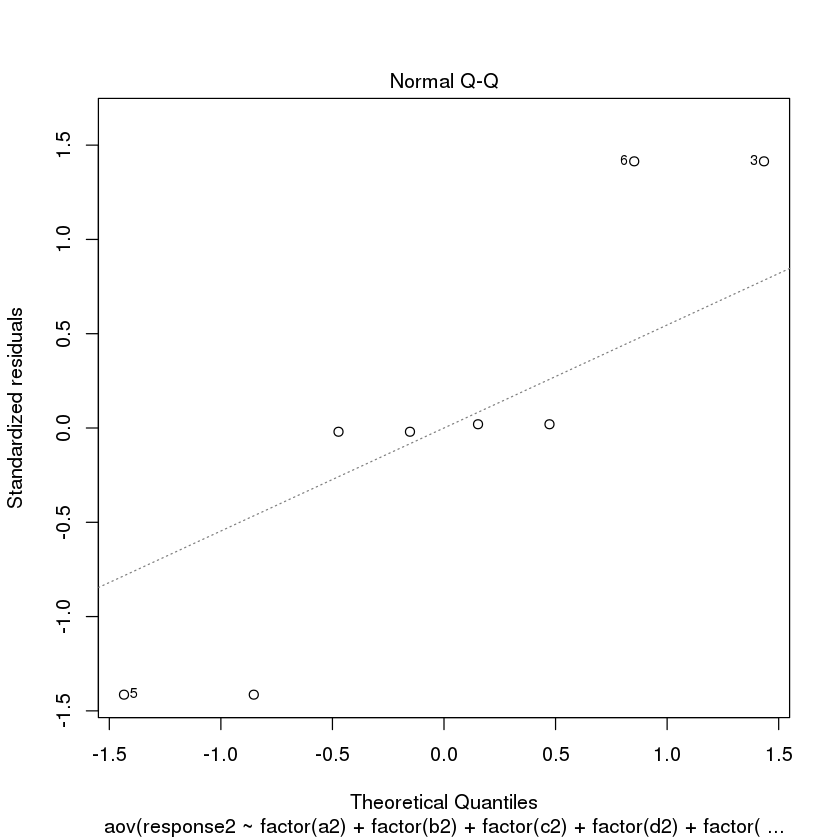

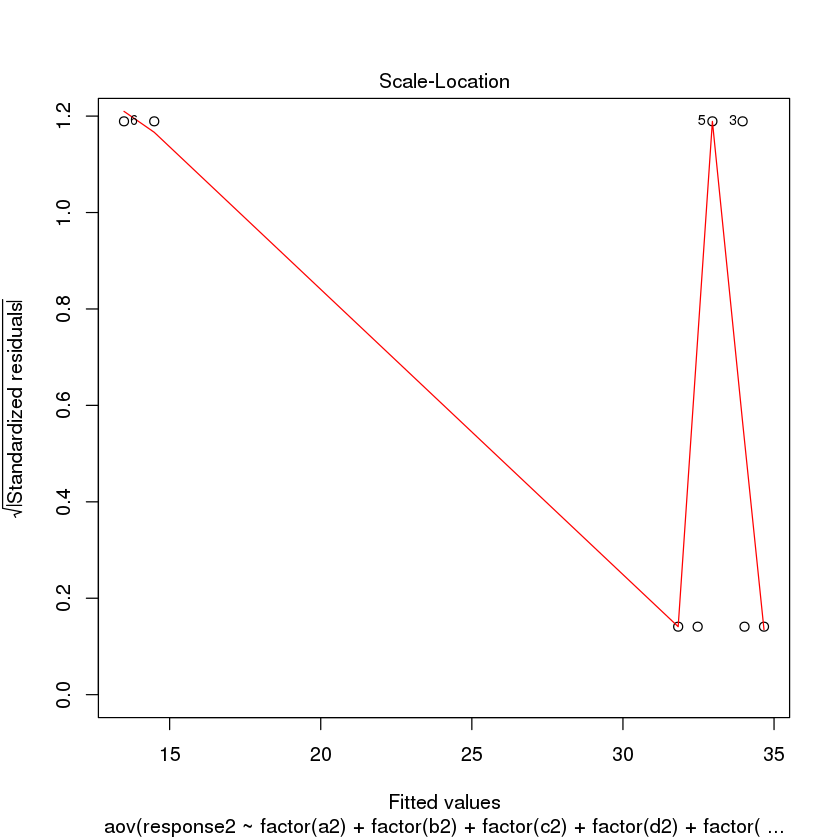

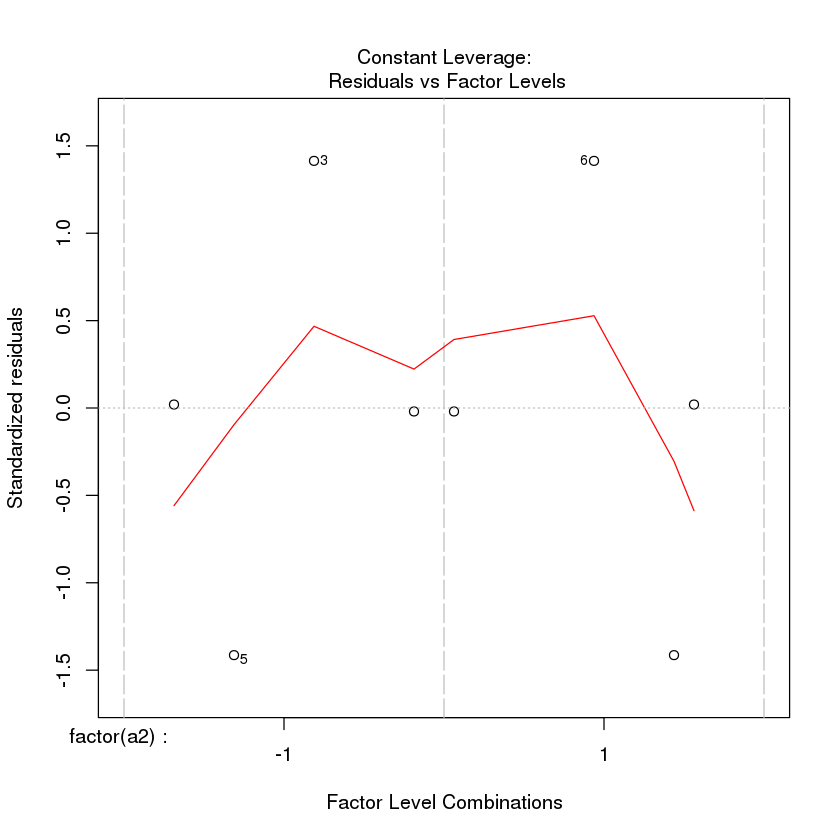

In [32]:
summary(rep2.lm)
plot(rep2.aov)